- Kyphosis is a spinal disorder in which an excessive curve of the spine results in an abnormal rounding of the upper back. 

- The condition is sometimes known as roundback or — in the case of a severe curve — as hunchback. Kyphosis can occur at any age but is common during adolescence.

In [1]:
#Importing The Packeges:-

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the DataSet:-

df = pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


- This dataset represents patients who where diagnosed with Kyphosis and had a corrective operation. The first column "Kyphosis" represents whether the surgery was successful and corrective of the curvature.
- Was the condition absent or present after the surgery? Represented by "absent" or "present". This is our target.
- Age is represented in months as this data is pediatric data.
- Number is the number of vertebrae operated on during the operation.
- Start is the most superior number in the vertebral column that was operated on.

In [4]:
#TO check the shape of the DataSet:-

df.shape

(81, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
#Check basic statistics for each columns:-

df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
#Finding null values columns:-

df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

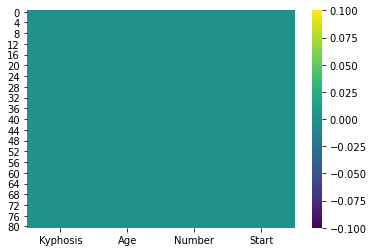

In [9]:
#Visualization of df.isnull():-

sns.heatmap(df.isnull(),cmap="viridis")
plt.show()

In [11]:
df["Kyphosis"].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

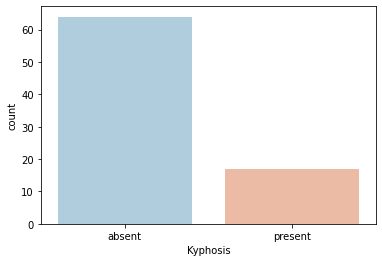

In [12]:
#EDA:-

sns.countplot(x="Kyphosis",data=df,palette='RdBu_r')
plt.show()

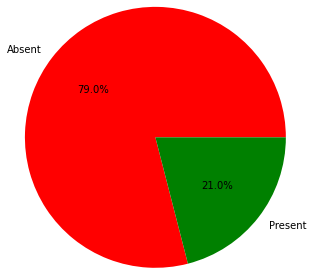

In [13]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['Kyphosis'].value_counts(), labels=["Absent","Present"], colors=['red','green'], autopct='%1.1f%%', radius=1.5)
plt.show()

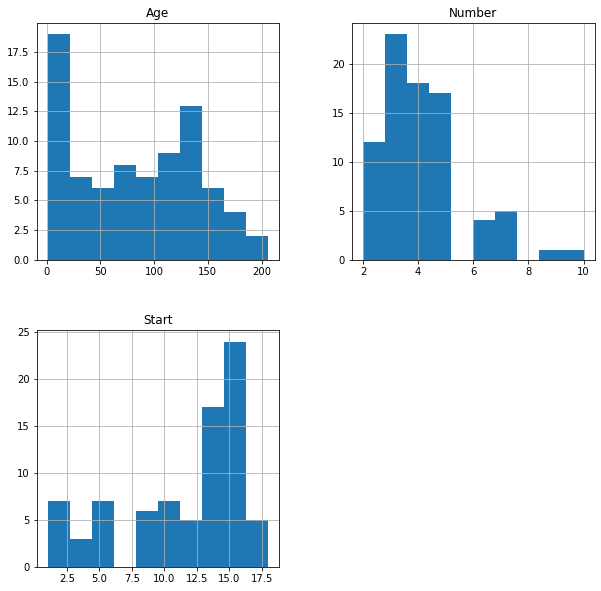

In [16]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(10,10))
plt.show()

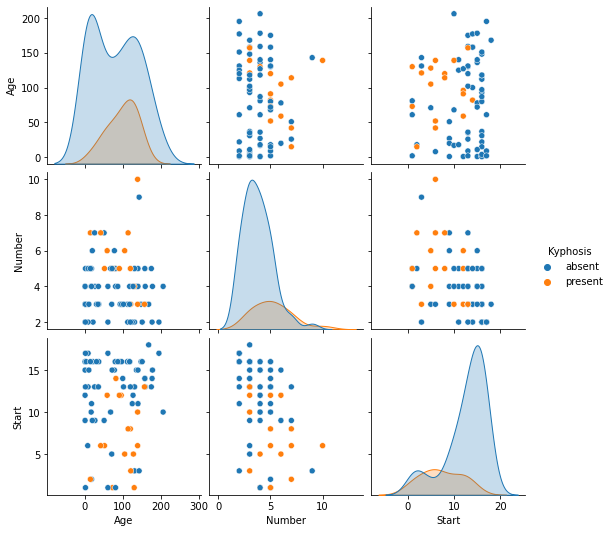

In [18]:
sns.pairplot(data=df,hue="Kyphosis")
plt.show()

# Separation of X and Y.

In [19]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

- Once you have X And Y you will do train test split.

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

- Importing all the necessary models:-

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [27]:
mymodel(logreg)

Accuracy :- 0.7619047619047619
              precision    recall  f1-score   support

      absent       0.79      0.94      0.86        16
     present       0.50      0.20      0.29         5

    accuracy                           0.76        21
   macro avg       0.64      0.57      0.57        21
weighted avg       0.72      0.76      0.72        21

[[15  1]
 [ 4  1]]


LogisticRegression()

In [28]:
mymodel(knn)

Accuracy :- 0.7619047619047619
              precision    recall  f1-score   support

      absent       0.76      1.00      0.86        16
     present       0.00      0.00      0.00         5

    accuracy                           0.76        21
   macro avg       0.38      0.50      0.43        21
weighted avg       0.58      0.76      0.66        21

[[16  0]
 [ 5  0]]


KNeighborsClassifier()

In [29]:
mymodel(svc)

Accuracy :- 0.7619047619047619
              precision    recall  f1-score   support

      absent       0.76      1.00      0.86        16
     present       0.00      0.00      0.00         5

    accuracy                           0.76        21
   macro avg       0.38      0.50      0.43        21
weighted avg       0.58      0.76      0.66        21

[[16  0]
 [ 5  0]]


SVC()

In [30]:
mymodel(dtc)

Accuracy :- 0.7619047619047619
              precision    recall  f1-score   support

      absent       0.92      0.75      0.83        16
     present       0.50      0.80      0.62         5

    accuracy                           0.76        21
   macro avg       0.71      0.78      0.72        21
weighted avg       0.82      0.76      0.78        21

[[12  4]
 [ 1  4]]


DecisionTreeClassifier()

In [31]:
mymodel(rfc)

Accuracy :- 0.7619047619047619
              precision    recall  f1-score   support

      absent       0.82      0.88      0.85        16
     present       0.50      0.40      0.44         5

    accuracy                           0.76        21
   macro avg       0.66      0.64      0.65        21
weighted avg       0.75      0.76      0.75        21

[[14  2]
 [ 3  2]]


RandomForestClassifier()

- After analysing all the default models, All the models give same accuracy.

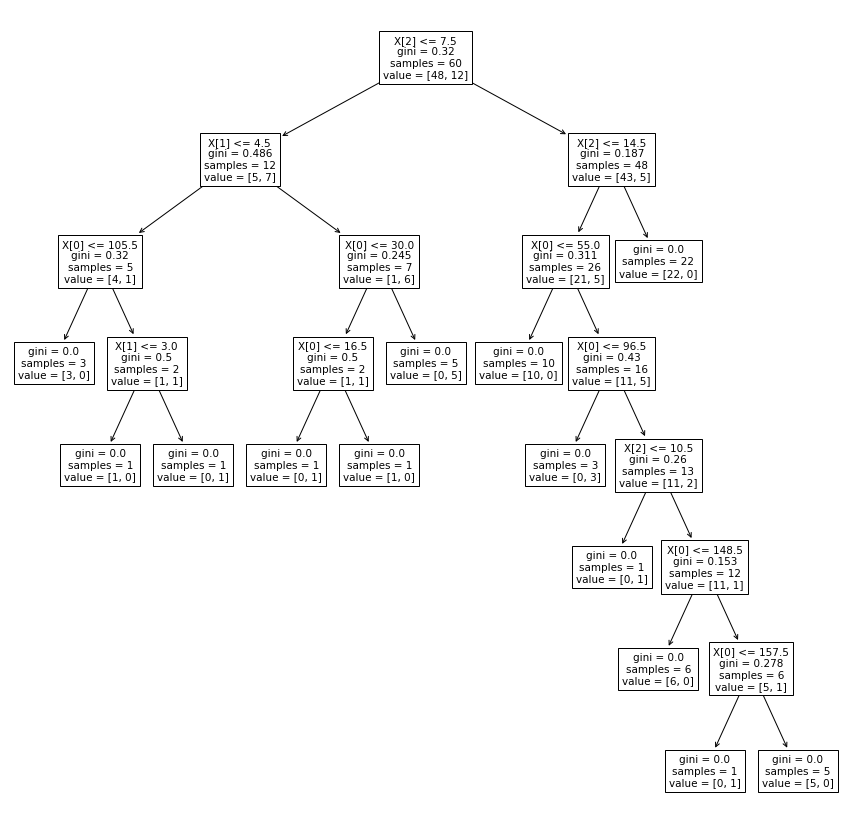

In [37]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dtc)
plt.show()